In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [22]:
df = pd.read_csv("50_Startups.csv")
print("Dataset Loaded Successfully. Shape:", df.shape)
df.head()


Dataset Loaded Successfully. Shape: (50, 5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000

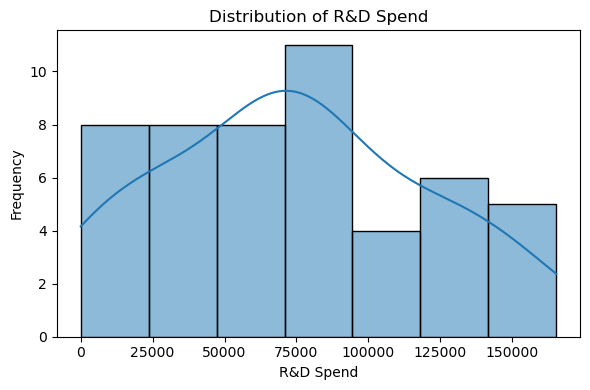

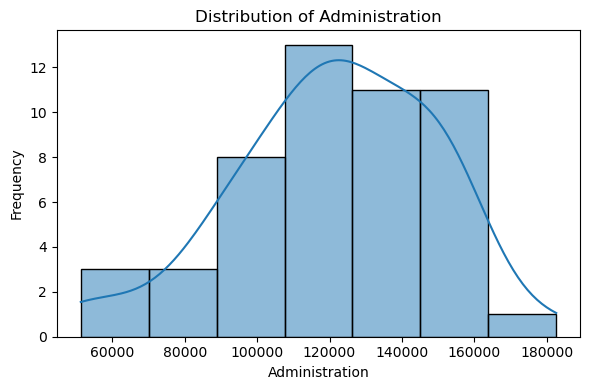

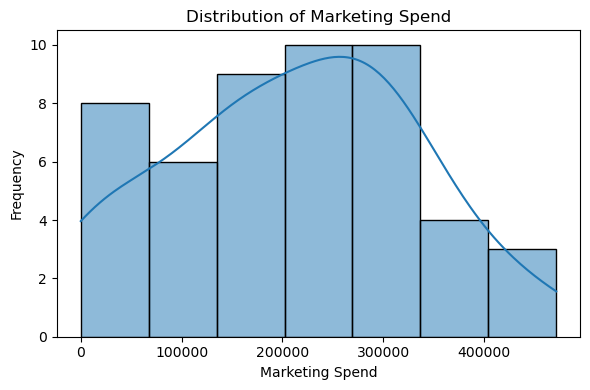

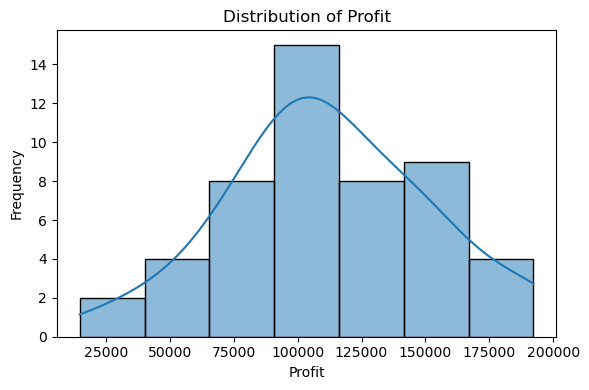

In [29]:
numerical_cols = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.savefig(f"graphs/hist_{col}.png")
    plt.show()



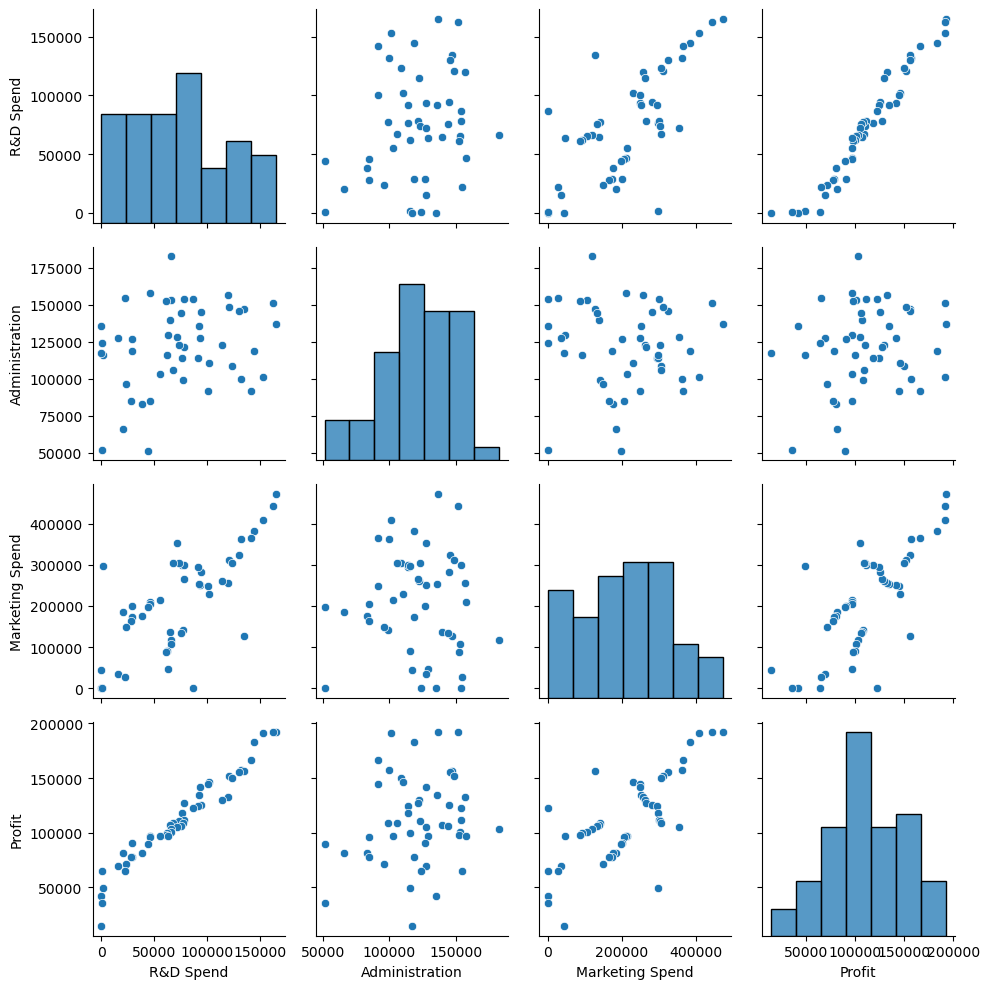

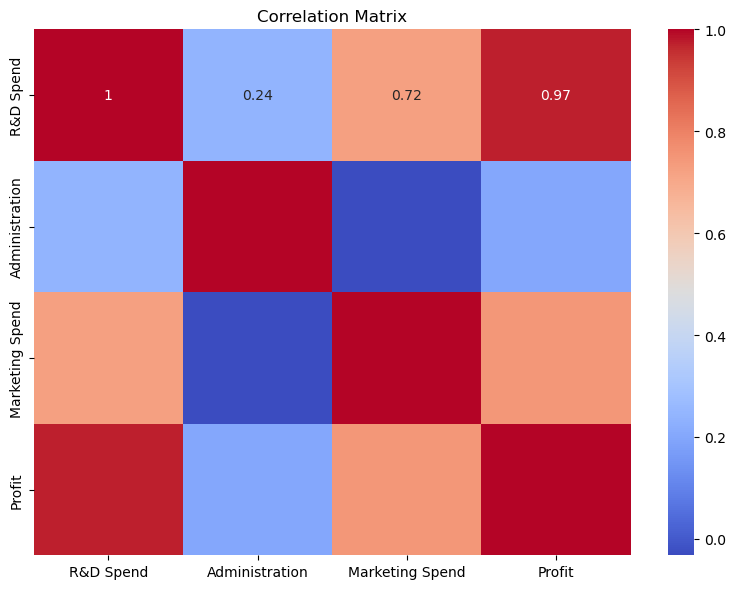

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create the folder if it doesn't exist
os.makedirs("graphs", exist_ok=True)

# Pairplot
sns.pairplot(df)
plt.tight_layout()
plt.savefig("graphs/pairplot.png")
plt.show()

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [35]:
df_encoded = df.copy()
df_encoded['State'] = LabelEncoder().fit_transform(df['State'])


In [36]:
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
r2_model1 = round(r2_score(y_test, y_pred1), 4)
print("R² Score for Model 1 (Raw Data):", r2_model1)


R² Score for Model 1 (Raw Data): 0.9001


In [37]:
X2 = df_encoded.drop('Profit', axis=1)
y2 = df_encoded['Profit']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y_pred2 = model2.predict(X2_test)
r2_model2 = round(r2_score(y2_test, y_pred2), 4)
print("R² Score for Model 2 (Encoded State):", r2_model2)


R² Score for Model 2 (Encoded State): 0.9001


In [38]:
df_log = df_encoded.copy()
df_log[['R&D Spend', 'Administration', 'Marketing Spend']] = df_log[['R&D Spend', 'Administration', 'Marketing Spend']].apply(lambda x: np.log1p(x))

X3 = df_log.drop('Profit', axis=1)
y3 = df_log['Profit']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
model3 = LinearRegression()
model3.fit(X3_train, y3_train)
y_pred3 = model3.predict(X3_test)
r2_model3 = round(r2_score(y3_test, y_pred3), 4)
print("R² Score for Model 3 (Log Transformed):", r2_model3)


R² Score for Model 3 (Log Transformed): 0.3425


In [39]:
X4 = df[['R&D Spend']]
y4 = df['Profit']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)
model4 = LinearRegression()
model4.fit(X4_train, y4_train)
y_pred4 = model4.predict(X4_test)
r2_model4 = round(r2_score(y4_test, y_pred4), 4)
print("R² Score for Model 4 (R&D Only):", r2_model4)



R² Score for Model 4 (R&D Only): 0.9265


In [40]:
comparison = pd.DataFrame({
    "Model Name": ["Model 1", "Model 2", "Model 3", "Model 4"],
    "Description": [
        "Raw Features",
        "+ Encoded State",
        "Log Transformation",
        "R&D Spend Only"
    ],
    "R² Score": [r2_model1, r2_model2, r2_model3, r2_model4]
})

comparison["R² Score"] = comparison["R² Score"].round(4)  # round for clean display
print("\n📊 Model Comparison Table:\n")
print(comparison.to_string(index=False))



📊 Model Comparison Table:

Model Name        Description  R² Score
   Model 1       Raw Features    0.9001
   Model 2    + Encoded State    0.9001
   Model 3 Log Transformation    0.3425
   Model 4     R&D Spend Only    0.9265
